In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Rainfall.csv')
df.head()





,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape


(145460, 23)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
df.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [8]:
# Handle Missing Values
df.isnull().sum()*100/len(df)


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [9]:
def randomsampleimputation(df, variable):
   
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [10]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")


In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


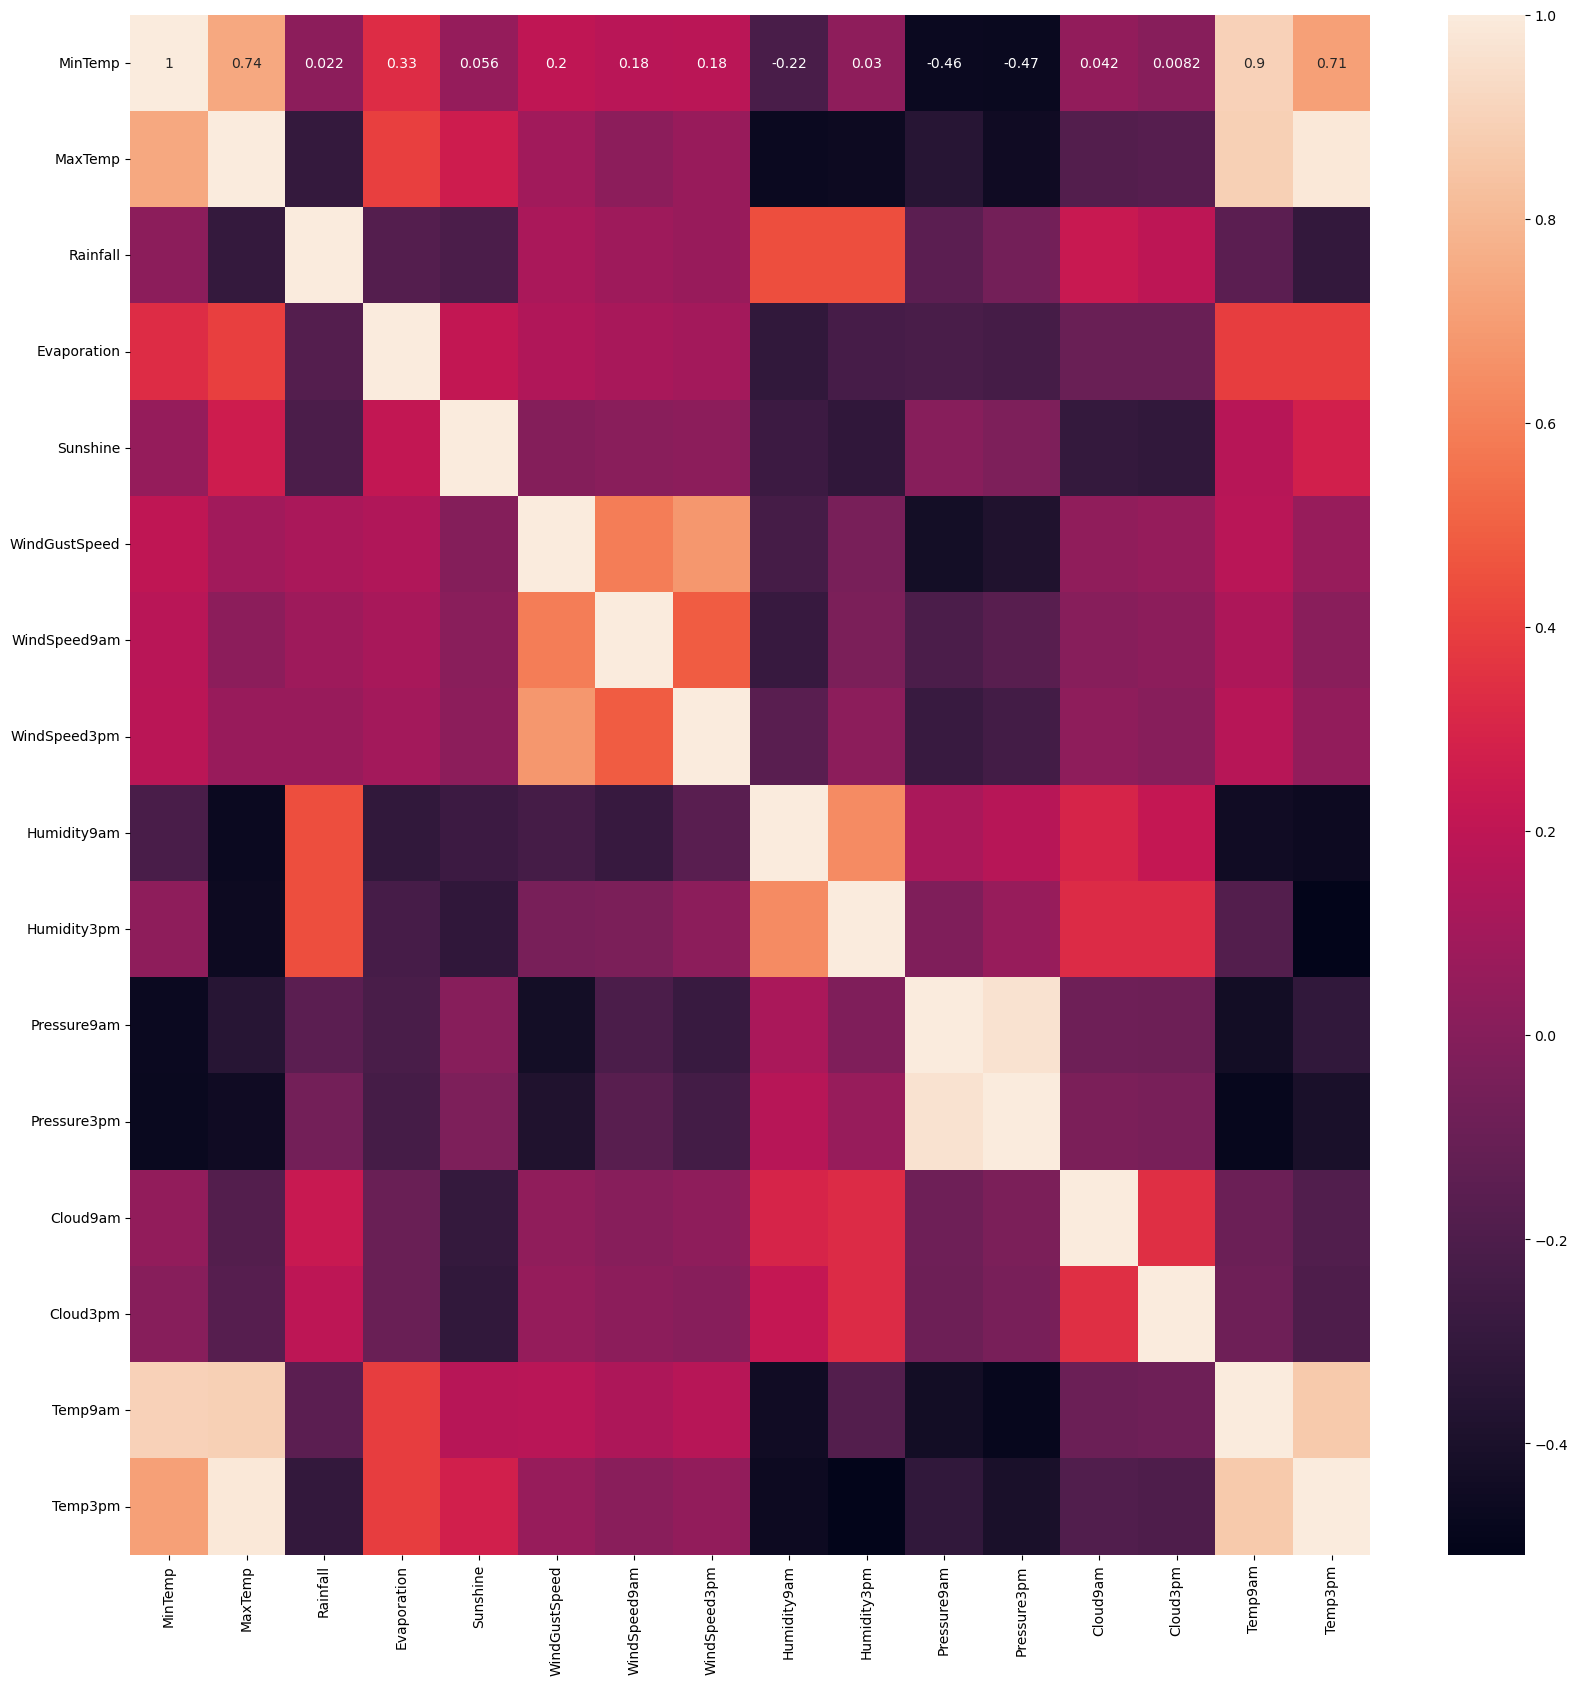

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corrmat = numeric_df.corr(method='spearman')

plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)


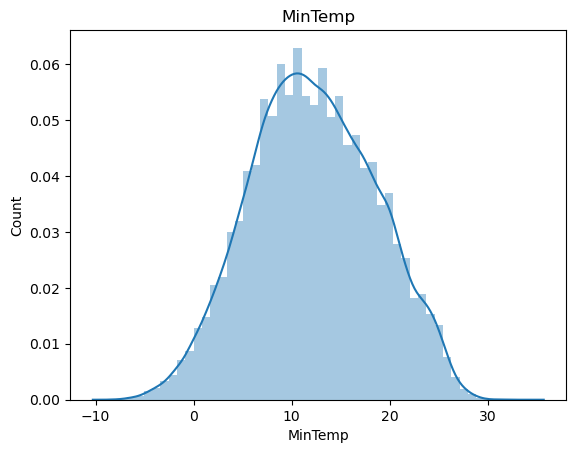

<Figure size 1500x1500 with 0 Axes>

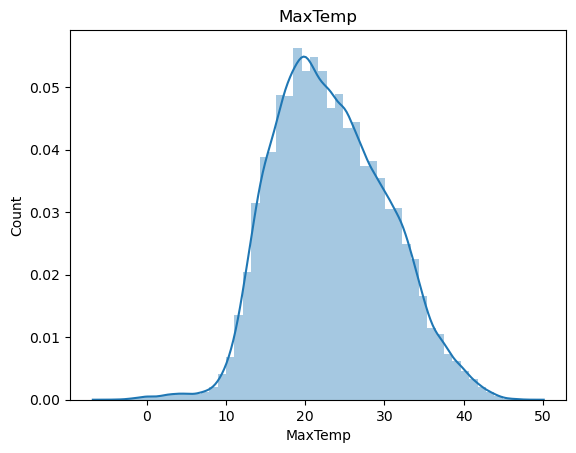

<Figure size 1500x1500 with 0 Axes>

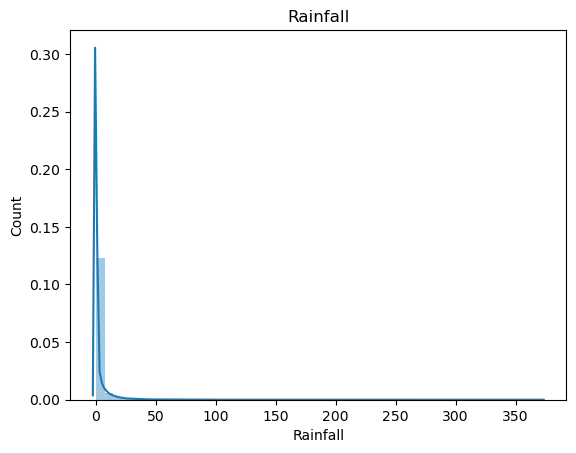

<Figure size 1500x1500 with 0 Axes>

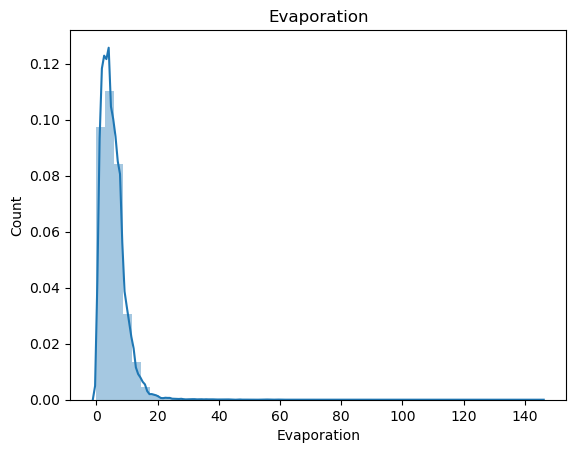

<Figure size 1500x1500 with 0 Axes>

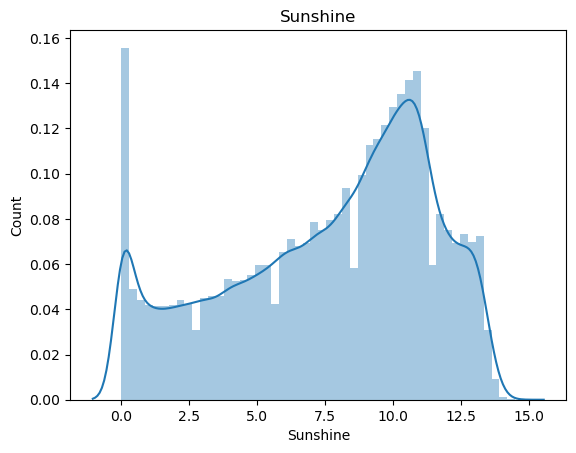

<Figure size 1500x1500 with 0 Axes>

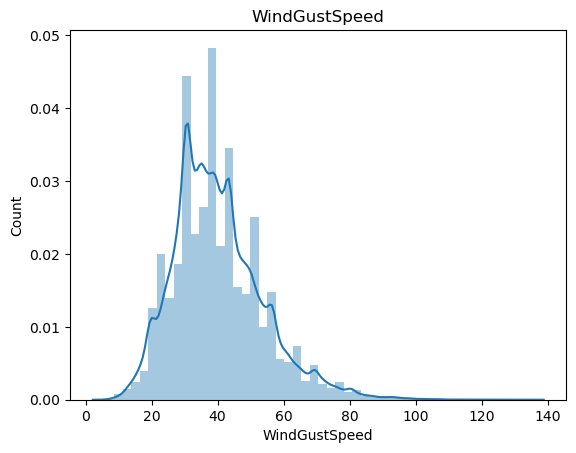

<Figure size 1500x1500 with 0 Axes>

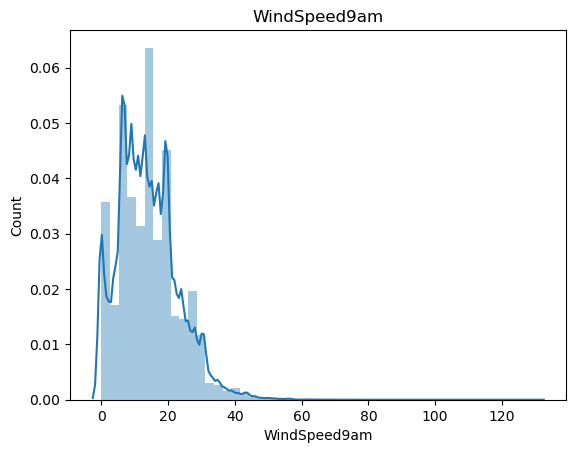

<Figure size 1500x1500 with 0 Axes>

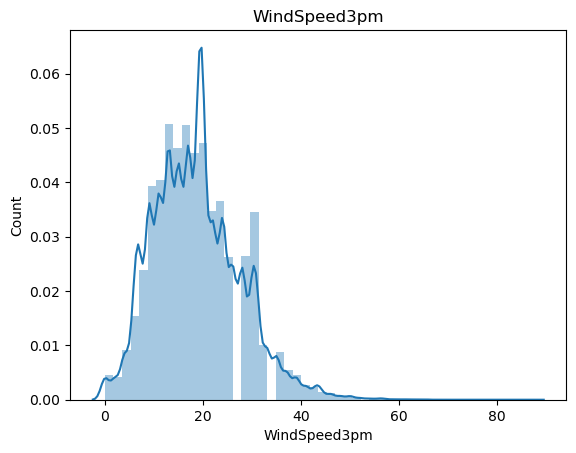

<Figure size 1500x1500 with 0 Axes>

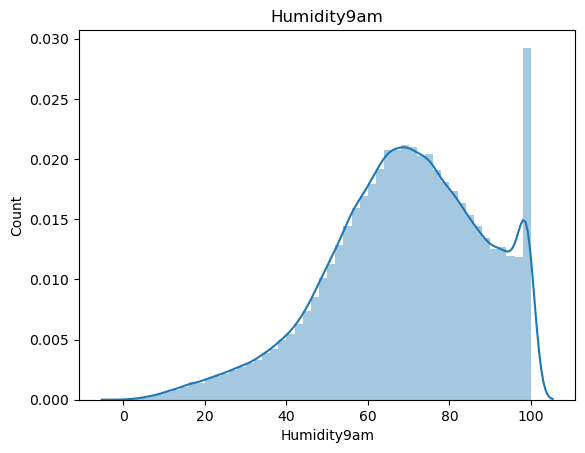

<Figure size 1500x1500 with 0 Axes>

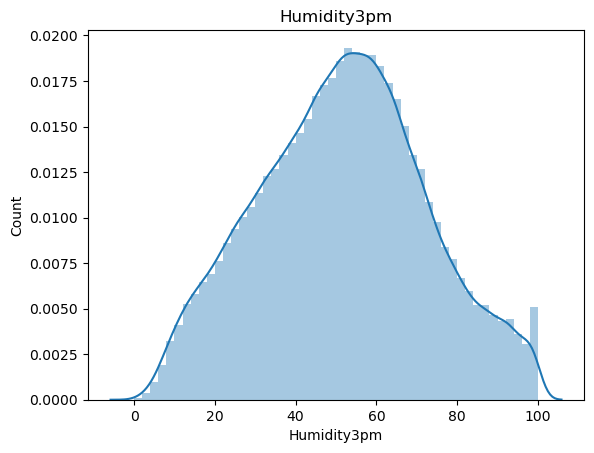

<Figure size 1500x1500 with 0 Axes>

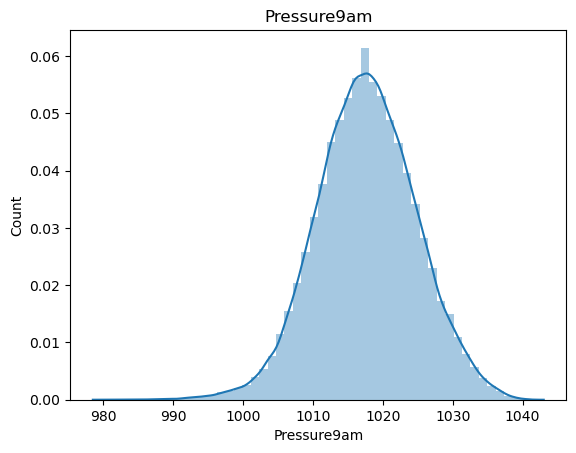

<Figure size 1500x1500 with 0 Axes>

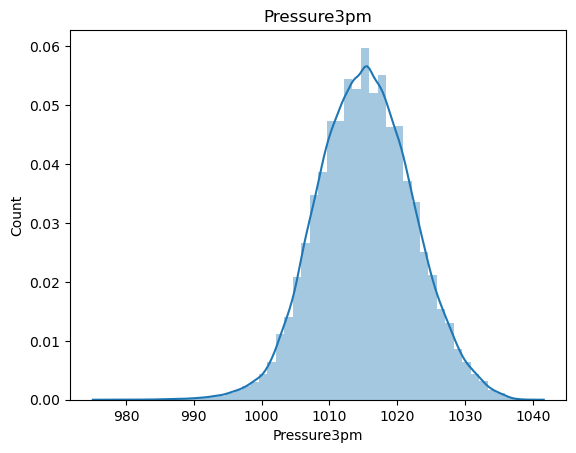

<Figure size 1500x1500 with 0 Axes>

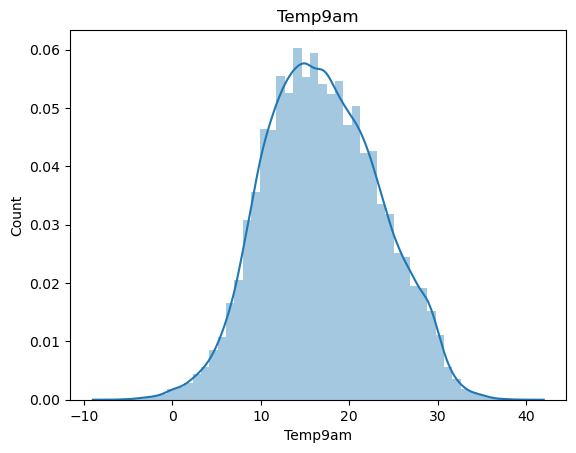

<Figure size 1500x1500 with 0 Axes>

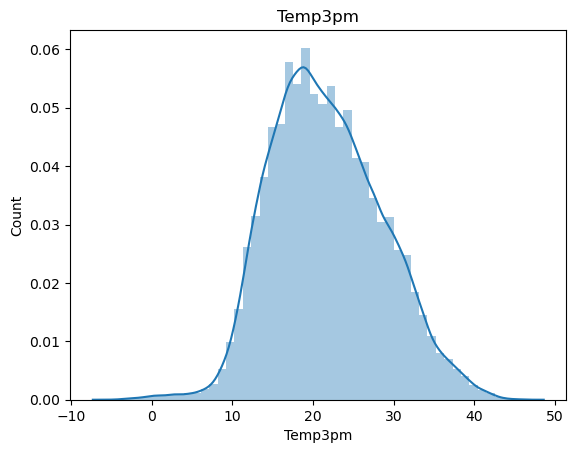

<Figure size 1500x1500 with 0 Axes>

In [13]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [14]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())


In [15]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [16]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [17]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [18]:
print("Unique values in RainToday:", df['RainToday'].unique())
print("Unique values in RainTomorrow:", df['RainTomorrow'].unique())


Unique values in RainToday: ['No' 'Yes' nan]
Unique values in RainTomorrow: ['No' 'Yes' nan]


In [19]:
df['RainToday'] = df['RainToday'].fillna(0)
df['RainTomorrow'] = df['RainTomorrow'].fillna(0)
print("Unique values in RainToday:", df['RainToday'].unique())
print("Unique values in RainTomorrow:", df['RainTomorrow'].unique())

Unique values in RainToday: ['No' 'Yes' 0]
Unique values in RainTomorrow: ['No' 'Yes' 0]


In [20]:
df['RainToday'] = df['RainToday'].replace({'Yes': '1', 'No': '0'})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': '1', 'No': '0'})

# Replace remaining NaN values with 0
df = df.fillna(0)

# Convert columns to the 'uint8' data type
df['RainToday'] = df['RainToday'].astype('uint64')
df['RainTomorrow'] = df['RainTomorrow'].astype('uint64')

# Print the DataFrame with replaced values
print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          2.4   
1       2008-12-02   Albury      7.4     25.1       0.0          3.6   
2       2008-12-03   Albury     12.9     25.7       0.0          2.6   
3       2008-12-04   Albury      9.2     28.0       0.0         18.4   
4       2008-12-05   Albury     17.5     32.3       1.0          5.4   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          1.4   
145456  2017-06-22    Uluru      3.6     25.3       0.0          7.6   
145457  2017-06-23    Uluru      5.4     26.9       0.0          6.8   
145458  2017-06-24    Uluru      7.8     27.0       0.0          2.6   
145459  2017-06-25    Uluru     14.9     22.6       0.0          1.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            8.3           W           44.0          W  ... 

In [21]:
# Display unique values for 'RainToday' and 'RainTomorrow'
print("Unique values in RainToday:", df['RainToday'].unique())
print("Unique values in RainTomorrow:", df['RainTomorrow'].unique())


Unique values in RainToday: [0 1]
Unique values in RainTomorrow: [0 1]


In [22]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = 0)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [23]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [24]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [25]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [26]:
encoder = preprocessing.LabelEncoder() 
df['Location']= encoder.fit_transform(df['Location']) 

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

In [28]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,...,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,...,1020.3,1.0,1.0,10.1,22.4,0,0,2017,6,21
145456,41,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,...,1019.1,8.0,5.0,10.9,24.5,0,0,2017,6,22
145457,41,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,...,1016.8,8.0,1.0,12.5,26.1,0,0,2017,6,23
145458,41,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


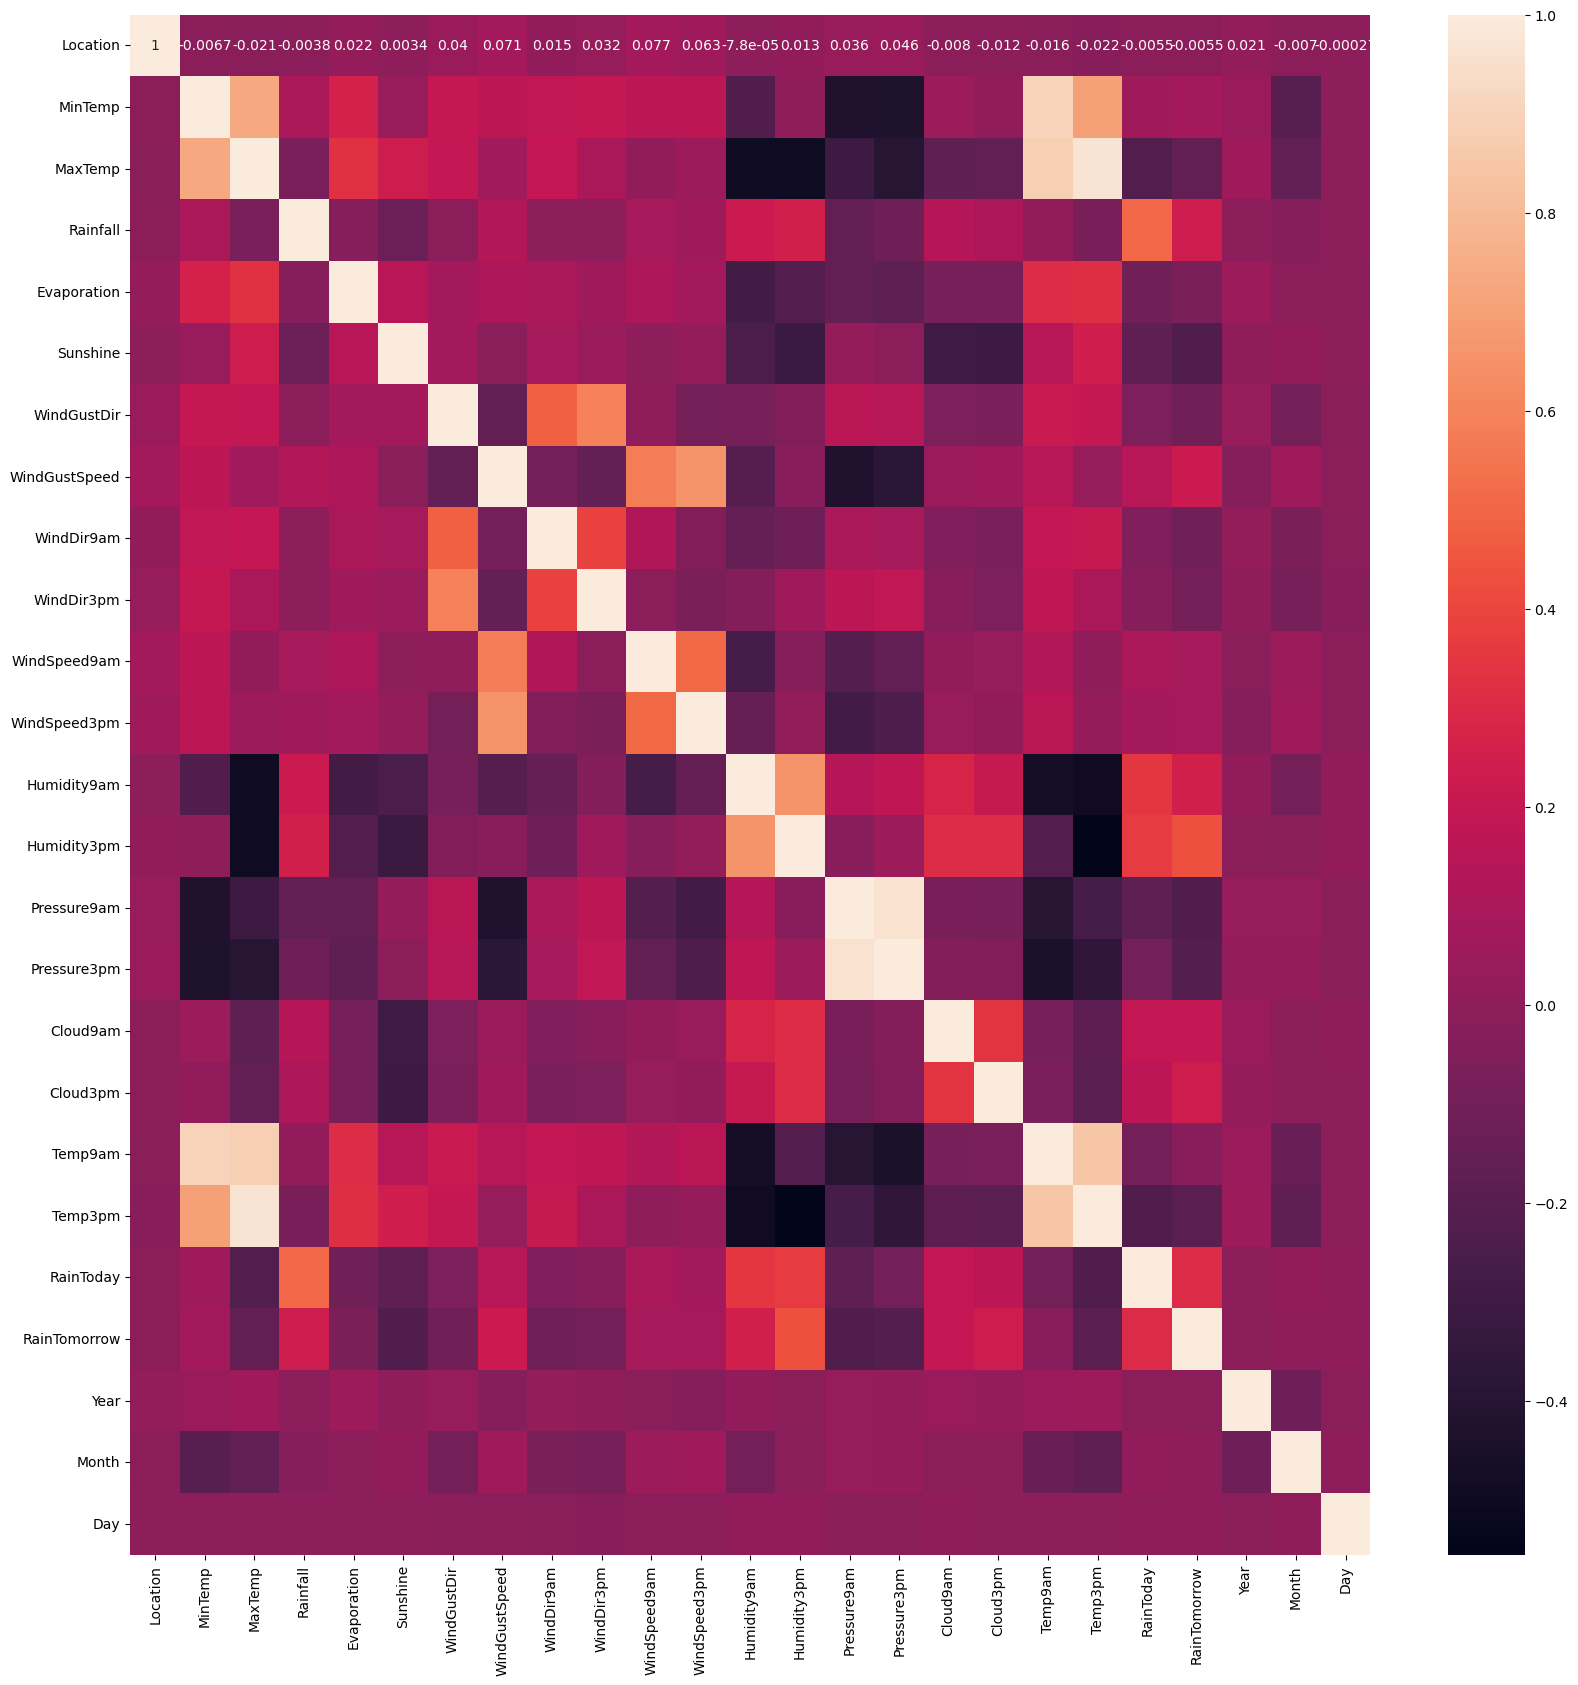

In [29]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

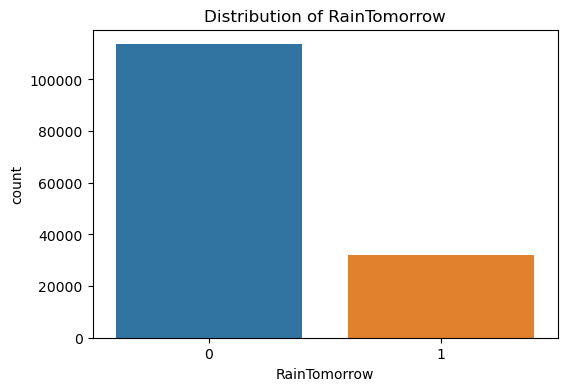

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()


In [31]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [33]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint64

In [34]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01218563, 0.00768659, 0.01467165, 0.05209937, 0.00400748,
       0.02935629, 0.00703341, 0.02485909, 0.00719157, 0.00531332,
       0.00497714, 0.00623458, 0.03506434, 0.10881518, 0.02764592,
       0.02415045, 0.02335987, 0.03046854, 0.00109184, 0.01817031,
       0.04442874, 0.00364862, 0.00345484, 0.00057789])

In [35]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=0)


Humidity3pm      0.108815
Rainfall         0.052099
RainToday        0.044429
Humidity9am      0.035064
Cloud3pm         0.030469
Sunshine         0.029356
Pressure9am      0.027646
WindGustSpeed    0.024859
Pressure3pm      0.024150
Cloud9am         0.023360
Temp3pm          0.018170
MaxTemp          0.014672
Location         0.012186
MinTemp          0.007687
WindDir9am       0.007192
WindGustDir      0.007033
WindSpeed3pm     0.006235
WindDir3pm       0.005313
WindSpeed9am     0.004977
Evaporation      0.004007
Year             0.003649
Month            0.003455
Temp9am          0.001092
Day              0.000578
dtype: float64

<Axes: >

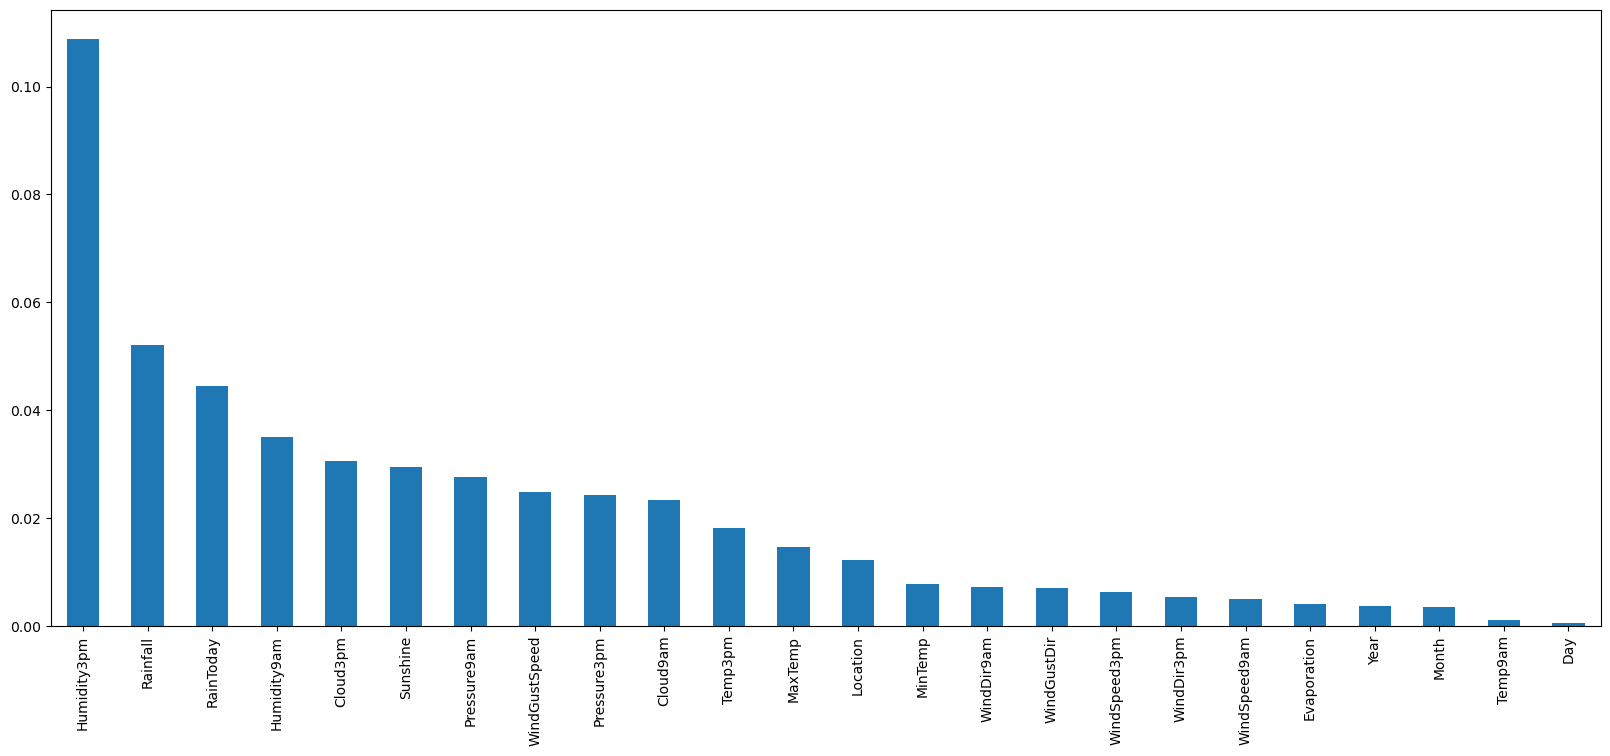

In [36]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [37]:
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
X_train_selected = sel_five_cols.fit_transform(X_train, y_train)

# Get the selected feature names from the original DataFrame
selected_feature_indices = sel_five_cols.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices].tolist()

# Include the 'RainTomorrow' column in the selected features
selected_feature_names.append('RainTomorrow')

# Create a new DataFrame with selected features and the 'RainTomorrow' column
df_selected_features = df[selected_feature_names]

# Save the DataFrame to a CSV file
df_selected_features.to_csv("processed.csv", index=False)


In [38]:
rain_today_counts = df['RainToday'].value_counts()

# Count of unique values in 'RainTomorrow'
rain_tomorrow_counts = df['RainTomorrow'].value_counts()


In [39]:
print("Count of unique values in RainToday:")
print(rain_today_counts)

print("\nCount of unique values in RainTomorrow:")
print(rain_tomorrow_counts)

Count of unique values in RainToday:
RainToday
0    113580
1     31880
Name: count, dtype: int64

Count of unique values in RainTomorrow:
RainTomorrow
0    113583
1     31877
Name: count, dtype: int64
